### Machine Learning pipeline using MNIST Dataset

### Import Libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical


### Load the MNIST Dataset

In [6]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Shape of the data (28x28 images, flattened into 784 pixels)
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


### Preprocess the Data

In [8]:
# Normalize the images to [0, 1] range
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the images to 1D arrays (28x28 = 784)
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


### Build the Model

Flatten: To flatten the 28x28 images into a 1D vector.

Dense layers: For fully connected layers.

Softmax: For multi-class classification.


In [11]:
# Build a simple neural [sequential] network model
model = Sequential([
    Flatten(input_shape=(28*28,)),   # Flatten the image
    Dense(128, activation='relu'),    # Fully connected layer with 128 neurons
    Dense(10, activation='softmax')   # Output layer for 10 classes (0-9)
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


C:\Users\Neo Dev 1\Anaconda\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Train the Model

In [14]:
# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8775 - loss: 0.4318
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9665 - loss: 0.1151
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9766 - loss: 0.0801
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9826 - loss: 0.0562
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9875 - loss: 0.0424


### Evaluate the Model

In [19]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy*100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9710 - loss: 0.0937
Test accuracy: 97.55%


### Make Predictions

In [23]:
# Predict on the test set
predictions = model.predict(X_test)

# Get the predicted label (the index of the max value)
predicted_labels = np.argmax(predictions, axis=1)

# Actual labels (before one-hot encoding)
y_test_labels = np.argmax(y_test, axis=1)

# Print the accuracy score using sklearn
print(f"Accuracy: {accuracy_score(y_test_labels, predicted_labels) * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Accuracy: 97.55%


### Visualize Predictions

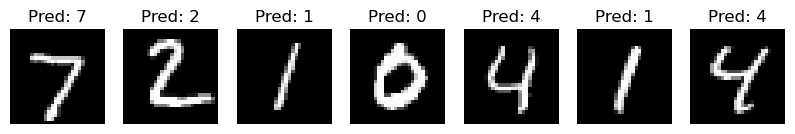

In [32]:
# Plot some test images and predictions
num_images = 7
plt.figure(figsize=(10, 5))

for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}")
    plt.axis('off')

plt.show()
